### Question 1: Generate a plot that details the 5 top Companies by Revenue for each Decade.
### Eg Top 5 for 1950-1959, 1960-1969 etc. This Must be a Single plot either static or interactive.

Importing all the libary to be used.

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

Creating a name and Reading the file(csv), I call pandas to read the file, the file is storage in folder call data.

In [10]:
data = pd.read_csv('data/fortune500.csv')              

Here starting to understand the dataset, I need to understand the dataset because .....I will The function head is to show the first 5 rows on dataset.

In [11]:
data.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


The function tail is to Show the last 5 rows on dataset

In [12]:
data.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


the function shape is to show the number of rows and columns, this is important because you will have the idea how big the data you are working and undertand...

In [13]:
data.shape

(25500, 5)

the function drop is to droping(Deleting) the columns profit (in millions) and Rank both are not necessary for this question, just to dont make confusion and much clear the dataset I prefer delete them.

In [14]:
data=data.drop(columns=["Profit (in millions)"])
data=data.drop(columns=["Rank"])

applying the function head again to see if my function drop worked.

In [15]:
data.head()

,Year,Company,Revenue (in millions)
0,1955,General Motors,9823.5
1,1955,Exxon Mobil,5661.4
2,1955,U.S. Steel,3250.4
3,1955,General Electric,2959.1
4,1955,Esmark,2510.8


applying function dropna to drop values NA and Null and showing description of the data set

In [16]:
data.dropna().describe() #look some basics on dataset

,Year,Revenue (in millions)
count,25500.00000,25500.000000
mean,1980.00000,4273.329635
std,14.71989,11351.884979
min,1955.00000,49.700000
25%,1967.00000,362.300000
50%,1980.00000,1019.000000
75%,1993.00000,3871.000000
max,2005.00000,288189.000000


the count function is to show how many time it present on the dataset

In [17]:
data.count()

Year                     25500
Company                  25500
Revenue (in millions)    25500
dtype: int64

the isnull fucntion is to detection missing value 

In [18]:
data.isnull().sum()

Year                     0
Company                  0
Revenue (in millions)    0
dtype: int64

the fuction nlargest is to show X largest on specific column, on this case I want the 5 largest row in the Revenue column

In [19]:
data.nlargest(5,'Revenue (in millions)') # This is important because I have a good idea which company has the largest Revenue in teh dataset

,Year,Company,Revenue (in millions)
25000,2005,Wal-Mart Stores,288189.0
25001,2005,Exxon Mobil,270772.0
24500,2004,Wal-Mart Stores,258681.0
24000,2003,Wal-Mart Stores,246525.0
23500,2002,Wal-Mart Stores,219812.0


fucntion info is to show information from the dataset

In [20]:
data.info() # this is important because the information about the type and how many row, columns make easy to understand the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Company                25500 non-null  object 
 2   Revenue (in millions)  25500 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 597.8+ KB


Creating a fucntion to make the Years in decade ex. instead be 1955,1956,1957 will be 1950

In [21]:
decade = 10 *(data['Year'] // 10) #This is important because I need to get the top 10 company by decade

Creating a new column with function insert. first argument is where will be the column start from 0 the second argument its the name you are given to column terd argument is the function I create before for decade and forth is to allow duplicate or not.

In [22]:
data.insert(3, "Top5", decade, allow_duplicates=True) #this is important because create a new column make easy to visualize and easy to plot

In [23]:
data.head() #function head again to visualize and check if the function is working.

,Year,Company,Revenue (in millions),Top5
0,1955,General Motors,9823.5,1950
1,1955,Exxon Mobil,5661.4,1950
2,1955,U.S. Steel,3250.4,1950
3,1955,General Electric,2959.1,1950
4,1955,Esmark,2510.8,1950


In [24]:
data.nlargest(5,'Top5') # nlargest fucntion is to show the X largest number of rows in specific column

,Year,Company,Revenue (in millions),Top5
22500,2000,General Motors,189058.0,2000
22501,2000,Wal-Mart Stores,166809.0,2000
22502,2000,Exxon Mobil,163881.0,2000
22503,2000,Ford Motor,162558.0,2000
22504,2000,General Electric,111630.0,2000


droping the column Year because I wont need it, from now on I will be using the new column

In [25]:
data=data.drop(columns=["Year"])

creating a group with the new column top5 and showing the head with the first 5 row on the column

In [26]:
data_1 = data.groupby(["Top5"]).head(5) #Creating the group is a easy way to plot a graph and shorten the specific data you want to show. Also I gave a new name to a group. 

In [27]:
data_1.head(30)

,Company,Revenue (in millions),Top5
0,General Motors,9823.5,1950
1,Exxon Mobil,5661.4,1950
2,U.S. Steel,3250.4,1950
3,General Electric,2959.1,1950
4,Esmark,2510.8,1950
2500,General Motors,11233.1,1960
2501,Exxon Mobil,7910.7,1960
2502,Ford Motor,5356.9,1960
2503,General Electric,4349.5,1960
2504,U.S. Steel,3643.0,1960


In [28]:
data_1.tail() #The function tail is to Show the last 5 rows on dataset

,Company,Revenue (in millions),Top5
22500,General Motors,189058.0,2000
22501,Wal-Mart Stores,166809.0,2000
22502,Exxon Mobil,163881.0,2000
22503,Ford Motor,162558.0,2000
22504,General Electric,111630.0,2000


calling the data or group Ijust created and ploting the graph with two columns, company & Revenue with a bar chart, rotating the names with 50% and fontside 8 with figure size 10X8. On this graph I`m showing the top 5 companies by decade starting from 1950 ending in 2005.

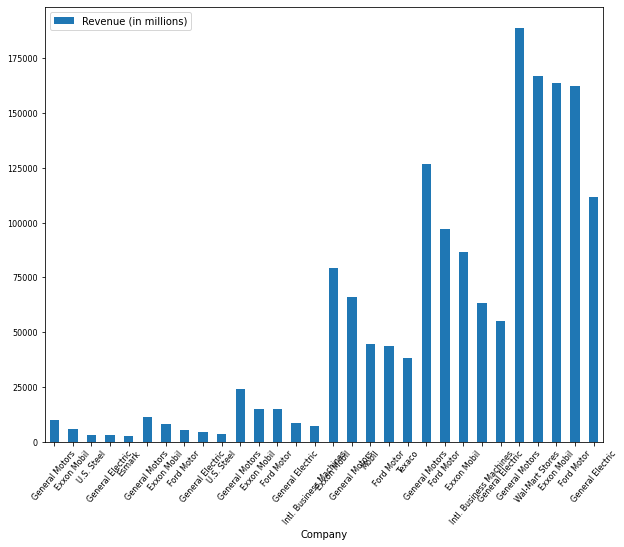

In [29]:
data_1.plot(x="Company", y="Revenue (in millions)", kind="bar", rot=50, fontsize=8, figsize=(10,8));

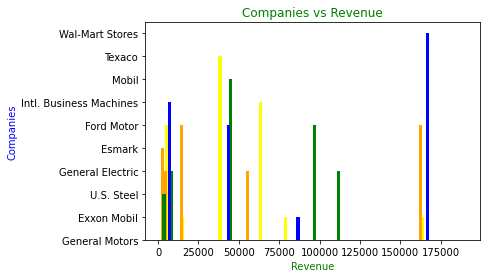

In [30]:
plt.bar(data_1["Revenue (in millions)"],data_1["Company"],data_1["Top5"],color=["orange","green","blue","yellow"])
plt.xlabel("Revenue", color="green")
plt.ylabel("Companies",color="blue")
plt.title("Companies vs Revenue", color="green")
plt.show()

## Plot a graph depicting the distribution of the “Revenue” in the top 20 Companies in 1971.


Importing all the libary to be used.

In [31]:
import pandas as pd
import matplotlib.pyplot as pt

In [32]:
data = pd.read_csv("data/fortune500.csv") #Creating a name and Reading the file(csv), I call pandas to read the file, the file is storage in folder call data.

In [33]:
data.dropna() # drop all empyt

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


Creating a new dataset with name and setting a new criteria to show only the data collected for Year 1971

In [34]:
data_1971 = data.query("Year==1971") # this is important because the question requires analysis of Revenue for the specific Year

In [35]:
data_1971.head() #Showing the top five companies and checking the query function works

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
8000,1971,1,General Motors,18752.4,609.1
8001,1971,2,Exxon Mobil,16554.2,1309.5
8002,1971,3,Ford Motor,14979.9,515.7
8003,1971,4,General Electric,8726.7,328.5
8004,1971,5,Intl. Business Machines,7504.0,1017.5


In [36]:
datatop20 = data_1971.nlargest(20,'Revenue (in millions)') #nlargest fucntion is to show the X largest number of rows in specific column

In [37]:
datatop20.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
8000,1971,1,General Motors,18752.4,609.1
8001,1971,2,Exxon Mobil,16554.2,1309.5
8002,1971,3,Ford Motor,14979.9,515.7
8003,1971,4,General Electric,8726.7,328.5
8004,1971,5,Intl. Business Machines,7504.0,1017.5


Plotting the graph with top 20 companies

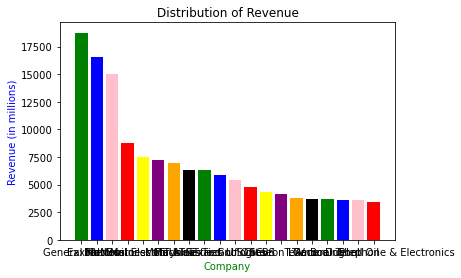

In [38]:
pt.bar(datatop20["Company"],datatop20["Revenue (in millions)"],color=["green","blue","pink","red","Yellow","purple","orange","black"])
pt.xlabel("Company",color="green")
pt.ylabel("Revenue (in millions)",color="blue")
pt.title("Distribution of Revenue",color="black")
pt.show()

## Find out and visualize which Top 10 Companies profit increased the most between 1990 and 1999 This Must be a Single plot either static or interactive.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt

In [40]:
data = pd.read_csv("data/fortune500.csv")

In [41]:
data.dropna()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


rename the column with a new name

In [42]:
data.rename(columns = {'Profit (in millions)': 'ProfitinMillions'}, inplace = True)

deleting the column selected.

In [43]:
data = data.drop(columns=["Revenue (in millions)"])

In [44]:
data.head()

,Year,Rank,Company,ProfitinMillions
0,1955,1,General Motors,806
1,1955,2,Exxon Mobil,584.8
2,1955,3,U.S. Steel,195.4
3,1955,4,General Electric,212.6
4,1955,5,Esmark,19.1


In [45]:
decade = 10 * (data['Year']// 10) 

Creating a new column with function insert. first argument is where will be the column start from 0 the second argument its the name you are given to column terd argument is the function I create before for decade and forth is to allow duplicate or not.

In [46]:
data.insert(4, "Decade_90", decade, allow_duplicates=True) #this is important because create a new column make easy to visualize and easy to plot

In [47]:
data.head()

,Year,Rank,Company,ProfitinMillions,Decade_90
0,1955,1,General Motors,806,1950
1,1955,2,Exxon Mobil,584.8,1950
2,1955,3,U.S. Steel,195.4,1950
3,1955,4,General Electric,212.6,1950
4,1955,5,Esmark,19.1,1950


In [48]:
data_1990 = data[data.Decade_90==1990] #Creating specific dataset for decade 1990-1999

In [49]:
data_1990.head()

,Year,Rank,Company,ProfitinMillions,Decade_90
17500,1990,1,General Motors,4224.3,1990
17501,1990,2,Ford Motor,3835,1990
17502,1990,3,Exxon Mobil,3510,1990
17503,1990,4,Intl. Business Machines,3758,1990
17504,1990,5,General Electric,3939,1990


Creating the index by Rank, to make easy to get the values for a better plotting

In [50]:
data_1990.set_index('Rank', inplace=True)
data_1990.head()

,Year,Company,ProfitinMillions,Decade_90
Rank,,,,
1,1990,General Motors,4224.3,1990
2,1990,Ford Motor,3835,1990
3,1990,Exxon Mobil,3510,1990
4,1990,Intl. Business Machines,3758,1990
5,1990,General Electric,3939,1990


In [51]:
data_1990.describe()

,Year,Decade_90
count,5000.000000,5000.0
mean,1994.500000,1990.0
std,2.872569,0.0
min,1990.000000,1990.0
25%,1992.000000,1990.0
50%,1994.500000,1990.0
75%,1997.000000,1990.0
max,1999.000000,1990.0


In [52]:
data_1990.values

array([[1990, 'General Motors', '4224.3', 1990],
       [1990, 'Ford Motor', '3835', 1990],
       [1990, 'Exxon Mobil', '3510', 1990],
       ...,
       [1999, 'Danaher', '182.9', 1990],
       [1999, 'Westvaco', '132', 1990],
       [1999, 'Ball', '16.6', 1990]], dtype=object)

In [53]:
data_1990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 500
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              5000 non-null   int64 
 1   Company           5000 non-null   object
 2   ProfitinMillions  5000 non-null   object
 3   Decade_90         5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 195.3+ KB


In [54]:
data_1 = data_1990.loc[1] # function loc show the first one defined by Rank and return 

In [55]:
data_1.head(10)

,Year,Company,ProfitinMillions,Decade_90
Rank,,,,
1,1990,General Motors,4224.3,1990
1,1991,General Motors,-1985.7,1990
1,1992,General Motors,-4452.8,1990
1,1993,General Motors,-23498.3,1990
1,1994,General Motors,2465.8,1990
1,1995,General Motors,4900.6,1990
1,1996,General Motors,6880.7,1990
1,1997,General Motors,4963,1990
1,1998,General Motors,6698,1990


In [56]:
data_1["ProfitinMillions"].astype(float) # The column Profit is a object as we can see on function info here I`m converting the column Profit to float

Rank
1     4224.3
1    -1985.7
1    -4452.8
1   -23498.3
1     2465.8
1     4900.6
1     6880.7
1     4963.0
1     6698.0
1     2956.0
Name: ProfitinMillions, dtype: float64

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


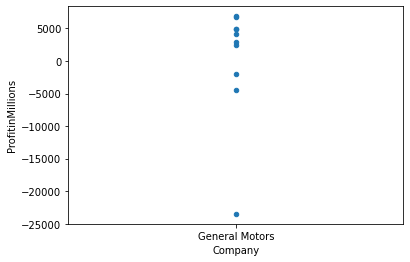

In [57]:
data_1.ProfitinMillions=pd.to_numeric(data_1.ProfitinMillions)

#data_GM.Company=pd.to_numeric(data_GM.Company)

data_1.plot.scatter(x='Company',y='ProfitinMillions');

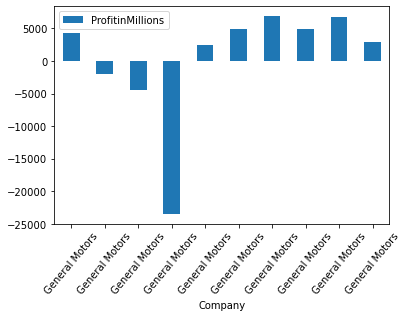

In [58]:
data_1.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [59]:
data_1990.loc[2]
data_2 = data_1990.loc[2]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


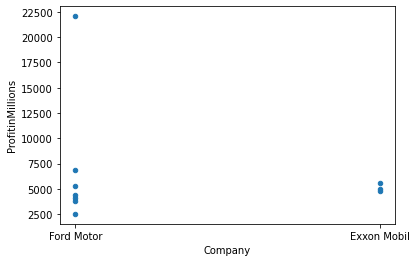

In [60]:
data_2.ProfitinMillions=pd.to_numeric(data_2.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_2.plot.scatter(x='Company',y='ProfitinMillions');

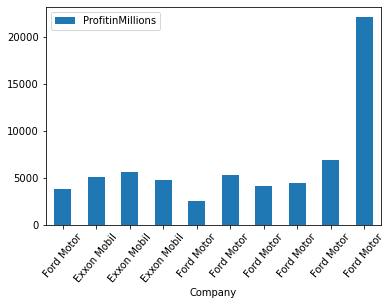

In [61]:
data_2.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [62]:
data_1990.loc[3]
data_3 = data_1990.loc[3]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


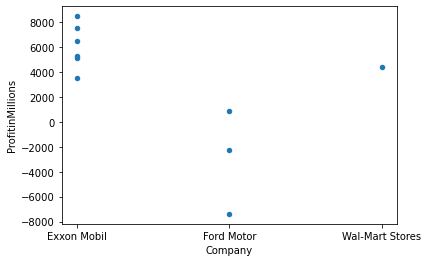

In [63]:
data_3.ProfitinMillions=pd.to_numeric(data_3.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_3.plot.scatter(x='Company',y='ProfitinMillions');

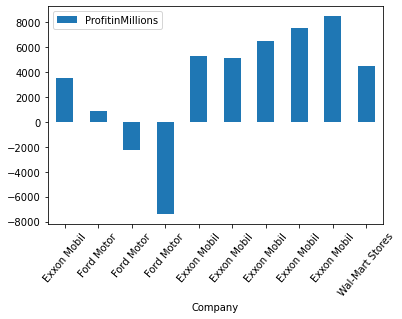

In [64]:
data_3.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [65]:
data_1990.loc[4]
data_4 = data_1990.loc[4]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


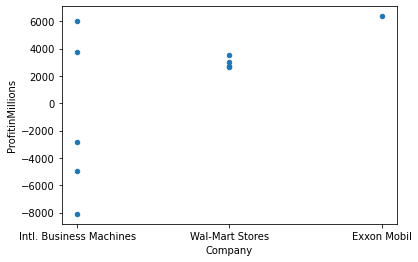

In [66]:
data_4.ProfitinMillions=pd.to_numeric(data_4.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_4.plot.scatter(x='Company',y='ProfitinMillions');

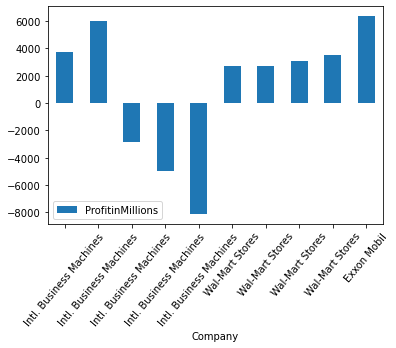

In [67]:
data_4.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [68]:
data_1990.loc[5]
data_5 = data_1990.loc[5]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


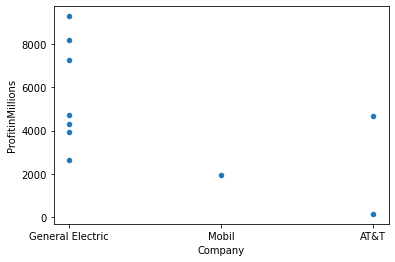

In [69]:
data_5.ProfitinMillions=pd.to_numeric(data_5.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_5.plot.scatter(x='Company',y='ProfitinMillions');

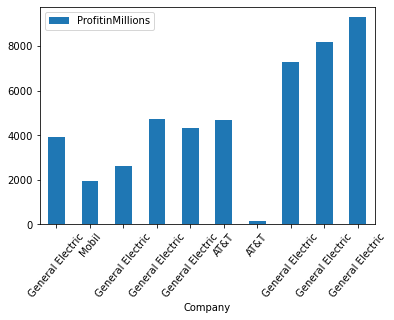

In [70]:
data_5.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [71]:
data_1990.loc[6]
data_6 = data_1990.loc[6]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


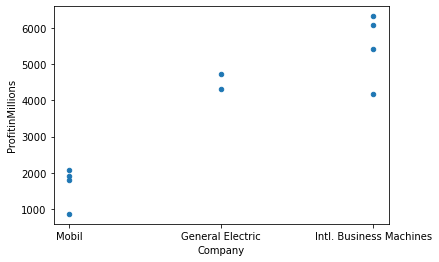

In [72]:
data_6.ProfitinMillions=pd.to_numeric(data_6.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_6.plot.scatter(x='Company',y='ProfitinMillions');

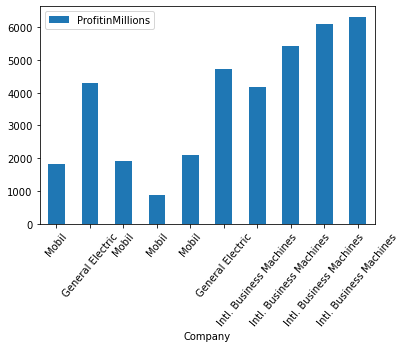

In [73]:
data_6.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [74]:
data_1990.loc[7]
data_7 = data_1990.loc[7]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


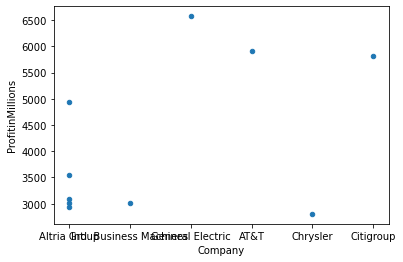

In [75]:
data_7.ProfitinMillions=pd.to_numeric(data_7.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_7.plot.scatter(x='Company',y='ProfitinMillions');

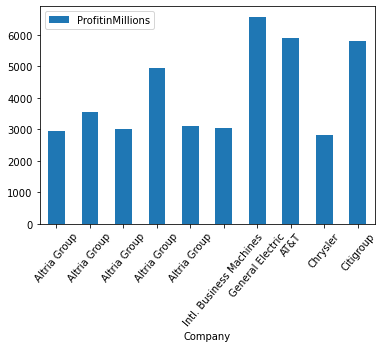

In [76]:
data_7.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [77]:
data_1990.loc[8]
data_8 = data_1990.loc[8]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


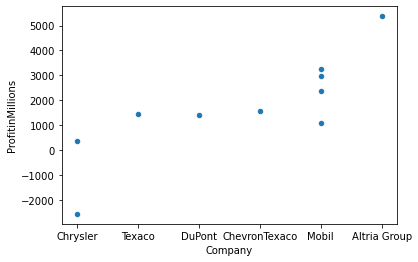

In [78]:
data_8.ProfitinMillions=pd.to_numeric(data_8.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_8.plot.scatter(x='Company',y='ProfitinMillions');

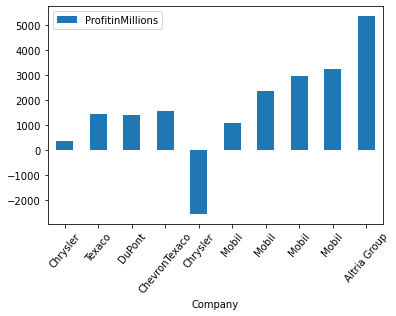

In [79]:
data_8.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [80]:
data_1990.loc[9]
data_9 = data_1990.loc[9]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


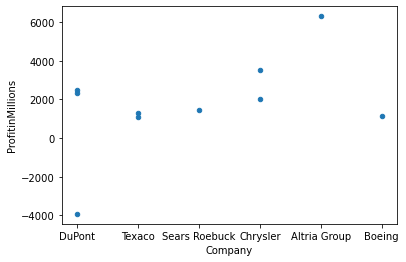

In [81]:
data_9.ProfitinMillions=pd.to_numeric(data_9.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_9.plot.scatter(x='Company',y='ProfitinMillions');

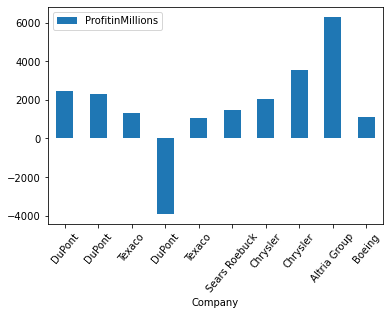

In [82]:
data_9.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

In [83]:
data_1990.loc[10]
data_10 = data_1990.loc[10]

C:\Users\ViniciusFraga\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


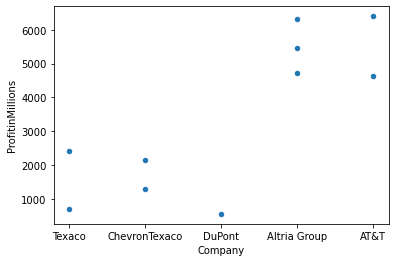

In [84]:
data_10.ProfitinMillions=pd.to_numeric(data_10.ProfitinMillions)
#data_GM.Company=pd.to_numeric(data_GM.Company)
data_10.plot.scatter(x='Company',y='ProfitinMillions');

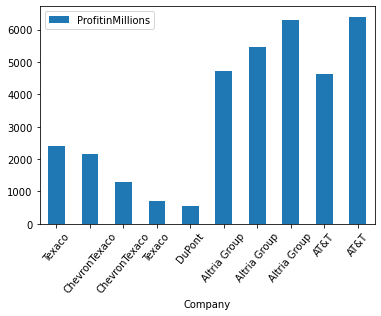

In [85]:
data_10.plot(x="Company", y="ProfitinMillions", kind="bar", rot=50, fontsize=10);

## Observe and plot the average revenue by decade This Must be a Single plot either static or interactive.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

In [87]:
data = pd.read_csv("data/fortune500.csv")
data.dropna()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [88]:
data.isnull().sum()

Year                     0
Rank                     0
Company                  0
Revenue (in millions)    0
Profit (in millions)     0
dtype: int64

In [89]:
decade = 10 * (data['Year']// 10)

In [90]:
data.insert(5, "Decade10", decade, allow_duplicates=True)

In [91]:
data.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade10
0,1955,1,General Motors,9823.5,806,1950
1,1955,2,Exxon Mobil,5661.4,584.8,1950
2,1955,3,U.S. Steel,3250.4,195.4,1950
3,1955,4,General Electric,2959.1,212.6,1950
4,1955,5,Esmark,2510.8,19.1,1950


In [92]:
GDecade = data.groupby(['Decade10']).mean() # Creating group by decade

In [93]:
Average = GDecade.reset_index(drop=True) # resetting index

In [94]:
data_ave = Average # getting average

In [95]:
data_ave.head()

,Year,Rank,Revenue (in millions)
0,1957.0,250.5,335.05244
1,1964.5,250.5,549.35638
2,1974.5,250.5,1522.21072
3,1984.5,250.5,3483.96466
4,1994.5,250.5,7351.89874


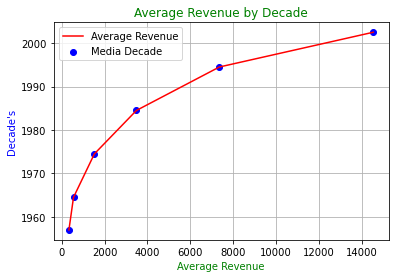

In [96]:
pt.scatter(data_ave["Revenue (in millions)"],data_ave["Year"],color="blue",label="Media Decade")
pt.xlabel("Average Revenue", color="green")
pt.ylabel("Decade's",color="blue")
pt.title("Average Revenue by Decade", color="green")
pt.plot(data_ave["Revenue (in millions)"],data_ave["Year"],color="red",label="Average Revenue")
pt.legend()
pt.grid()
pt.show()